In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib
matplotlib.rcParams.update({
    "font.size": 20,
    "boxplot.boxprops.color": "gray",
    "boxplot.patchartist":True,
    "boxplot.showfliers": False,
    "boxplot.notch": True,
    "boxplot.medianprops.color": "firebrick",
    "patch.facecolor": "lightgray"
                         })

In [3]:
full_lst=os.listdir("evaluation_errors2l")
curr_value=float(10)
name=""
for filename in full_lst:
    try:
        with open("evaluation_errors2l/"+filename, "r") as f:
            value=float(f.read())
    except IsADirectoryError:
        print("next")
    if value<curr_value:
        curr_value=value
        name=filename
print(curr_value, name)

next
0.034593523 0.001_0.15_50_100_22_11_512_20220716-152403_mse_value_synth.csv


In [21]:
path="evaluation_errors3l"
full_lst=os.listdir(path)
curr_value=float(10)
name=""
for filename in full_lst:
    if re.findall("mse_errors_synth", filename):
        values=pd.read_csv(os.path.join(path, filename))
        median=np.median(values)
    if median<curr_value:
        curr_value=median
        name=filename
print(curr_value, name)

5.0386879593133926e-05 0.0_25_50_75_12_8_4_256_20220719-122140_mse_errors_synth.csv


In [87]:
def iterate_files(path):
    noise_levels=[np.round(x, 2) for x in np.arange(0.0, 0.6, 1.0/20)]
    noise_df=pd.DataFrame(columns=["exp", "synth"], index=noise_levels)

    for case, case_color in zip(["exp"], ["red"]):
        full_lst=os.listdir(path)
        absolute_df=pd.DataFrame(columns=["values"], index=noise_levels)
        for noise_level in noise_levels:
            mse_error_lst=[]
            absolute_error_array_th=[]
            absolute_error_array_rh=[]
            absolute_error_array_sld=[]
            for filename in full_lst:
                if path=="evaluation_errors3l":
                    noise_matches=re.findall(f"({str(noise_level)})\_(\d{{2}})\_(\d{{2}})\_(\d{{2}})\_(\d{{2}})\_(\d{{1}})\_(\d{{1}})\_(\d{{3}})\_(.*)\_mse\_errors\_exp\.csv", filename)
                else:
                    print("test")
                if case=="exp":
                    if path=="evaluation_errors3l":
                        absolute_matches_th=re.findall(f"({noise_level}).*\_th.csv$", filename)
                        absolute_matches_rh=re.findall(f"({noise_level}).*\_rh.csv$", filename)
                        absolute_matches_sld=re.findall(f"({noise_level}).*\_sld.csv$", filename)
                    else:
                        absolute_matches_th=re.findall(f".*\_({noise_level}).*\_th.csv$", filename)
                        absolute_matches_rh=re.findall(f".*\_({noise_level}).*\_rh.csv$", filename)
                        absolute_matches_sld=re.findall(f".*\_({noise_level}).*\_sld.csv$", filename)
                    if absolute_matches_th:
                        absolute_error_array_th.append(np.loadtxt(os.path.join(path, f"{filename}")))
                    if absolute_matches_rh:
                        absolute_error_array_rh.append(np.loadtxt(os.path.join(path, f"{filename}")))
                    if absolute_matches_sld:
                        absolute_error_array_sld.append(np.loadtxt(os.path.join(path, f"{filename}")))
                if noise_matches:
                    mse_error_lst.append(np.loadtxt(os.path.join(path, f"{filename}")))
            noise_df.loc[noise_level, case]=mse_error_lst
        if case=="exp":
            absolute_df.loc[noise_level, "values"]=[absolute_error_array_th, absolute_error_array_rh, absolute_error_array_sld]
    return noise_df, absolute_df

In [88]:
noise_df, absolute_df=iterate_files("evaluation_errors3l")

,values
0.00,NaN
0.05,NaN
0.10,NaN
0.15,NaN
0.20,NaN
0.25,NaN
0.30,NaN
0.35,NaN
0.40,NaN
0.45,NaN


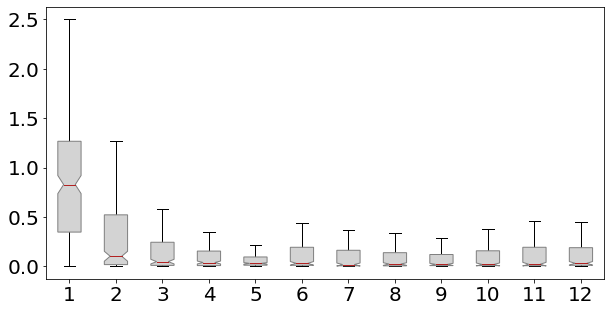

In [89]:
fig, ax = plt.subplots(1, figsize=(10,5))

ax.boxplot([noise_df.loc[noise_level, "exp"][0].tolist() for noise_level in noise_df.index.values])
absolute_df

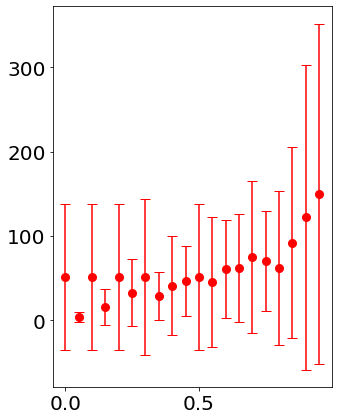

In [83]:
path="evaluation_errors3l/current_state/"
full_lst=os.listdir(path)
fig_param, ax = plt.subplots(1, figsize=(5,7))
noise_df=pd.DataFrame(columns=["exp"], index=noise_levels)
noise_levels=[np.round(x, 2) for x in np.arange(0.0, 1, 1.0/20)]
for noise_level in noise_levels:
    sld=[]
    for filename in full_lst:
        noise_matches=re.findall(f"({noise_level}).*_absolute_errors_synth.csv$", filename)
        if noise_matches:
            array=np.loadtxt(os.path.join(path, f"{filename}"))
            sld.append(array[:, 1])
    noise_df.loc[noise_level, "exp"]=np.array(sld)
for noise_level in noise_levels:
    ax.errorbar(noise_level, np.mean(noise_df.loc[noise_level, "exp"]), np.std(noise_df.loc[noise_level, "exp"]), fmt='o', markersize=8, capsize=5, color=case_color)